# **Notebook 2,3 and 4 - Pre-Processing, Feature Management and Model Selection**

## **Table of Contents**

 * [0. Introduction](#0-introduction)

* [1. Importing Section](#1-importing-section)
    * [1.1. Importing Libraries](#11-importing-libraries)
    * [1.2. Importing the Datasets](#12-importing-the-learn-and-predict-dataset)

* [2. Notebook 2: Data Preprocessing](#2-notebook-2:-data-preprocessing)

* [3. Notebook 3: Feature Management](#3-notebook-3:-feature-management)

* [4. Notebook 4: Modelling and Tuning](#4-notebook-4:-modelling-and-tuning)
  
* [5. Conclusion](#5-conclusion)



# **4. Notebook 4: Modelling and Tuning**


## **1. Introduction**

After exploring the data in notebook 1, it is now time to move on 
In this notebook, our primary objective is to transition from **raw data to a high-performance predictive model.** To achieve this, we 

Our workflow proceeds through **three** logical phases:

* **Data Preprocessing** 

* **Feature Management** 

* **Modelling and Tuning** 



## **2. Importing Section**

### **1.1. Importing Libraries**

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import pickle, os
import matplotlib.pyplot as plt
import seaborn as sns

# Data partitioning
from sklearn.model_selection import train_test_split, StratifiedKFold 

# Imputation
from sklearn.impute import SimpleImputer

# Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Scaling methods
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

#Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
import scipy.stats as stats

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### **1.2. Importing the Learn and Predict Dataset**

In [2]:
dataset_learn = pd.read_csv('Nata_Files/learn.csv', index_col = 0) # index_col = 0 makes the first column of the dataset the index
dataset_learn

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,Lisboa,NaN,Pastel Nata,207.0,42.74,22.8,5.7,KO
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,NaN,Lisboa,306.0,NaN,245.0,41.73,11.6,4.0,KO
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,NaN,Porto,121.0,NaN,186.0,75.10,20.3,7.5,OK
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,NaN,Lisboa,357.0,Pastel de Nata,186.0,46.41,73.3,4.2,OK
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,NaN,Lisboa,202.0,Pastel de nata,218.0,56.52,80.1,6.0,KO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,60.0,18.0,35.0,96.0,72.0,11.0,215.0,3.3,NaN,Lisboa,222.0,NaN,177.0,34.42,58.9,5.7,OK
5197,61.0,25.0,40.0,96.4,99.0,9.0,367.0,3.2,NaN,Lisboa,366.0,Pastel De Nata,224.0,46.18,141.4,6.5,KO
5198,69.0,18.0,36.0,97.7,90.0,11.0,206.0,3.6,NaN,Lisboa,203.0,Pastel de nata,158.0,28.46,10.0,6.0,OK


&nbsp;&nbsp;&nbsp;&nbsp; The `predict.csv` dataset (unseen data)  needs to go through the same transformations applied previously to the training data. That way, we **guarantee consistency** between all datasets.
The Machine Learning model must receive all the datasets with the **same format**: the same columns on the same scales and with the same categorical encodings used during the training phase.


In [3]:
'''
Loading the prediction dataset
'''
predict_data = pd.read_csv('Nata_Files/predict.csv', index_col = 0)
display(predict_data.shape)
predict_data

(1300, 16)

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract
id,,,,,,,,,,,,,,,,
5201,79.0,22,40,98.6,79.0,9.0,259.0,3.2,NaN,Lisboa,268.0,NaN,208.0,49.63,182.6,4.0
5202,49.0,26,32,101.9,105.0,9.0,287.0,3.2,NaN,Lisboa,287.0,Pastel de nata,189.0,182.54,76.2,4.8
5203,80.0,28,24,96.6,20.0,10.0,64.0,3.4,NaN,Porto,74.0,Pastel Nata,201.0,100.41,23.5,6.1
5204,74.0,21,37,97.2,81.0,9.0,314.0,3.0,NaN,Lisboa,317.0,NaN,220.0,46.66,143.2,4.9
5205,41.0,19,41,97.3,104.0,10.0,246.0,3.2,NaN,Lisboa,243.0,Pastel Nata,191.0,39.45,143.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,73.0,24,23,98.9,58.0,10.0,208.0,3.1,NaN,Lisboa,200.0,Pastel De Nata,189.0,37.80,142.6,4.0
6497,66.0,21,34,100.6,62.0,10.0,277.0,3.1,NaN,Lisboa,264.0,Pastel de nata,235.0,33.78,102.2,4.8
6498,41.0,49,23,98.9,20.0,11.0,57.0,3.4,NaN,Porto,69.0,Pastel de nata,243.0,86.73,21.3,7.4


# **2. Notebook 2: Data Preprocessing**


Following the Exploratory Data Analysis in Notebook 1, where we identified the distribution, relationships, and quality issues within the dataset, this notebook focuses on the **Data Preprocessing** phase. 

Raw data is rarely ready for Machine Learning algorithms, therefore, it requires **cleaning, transformation, and structuring** to ensure model performance.

### **Objectives & Our Workflow**

1.  **Data Cleaning & Handling Inconsistencies:**
    Before any manipulation, we start to handle physical inconsistencies (like impossible percentages), standardizing categorical text (unifying "LISBOA " vs. "lisboa"), and removing any irrelevant or constant features.

2.  **Feature Engineering:**
    We create new features such as `baking_intensity` and `sugar_fat_ratio` to try to enhance the predictive power overall

3.  **Strict Data Partitioning:**
    We split the data into **Train (70%)**, **Validation (15%)**, and **Test (15%)** sets using a stratified approach. This ensures that the class balance (OK vs. KO) is preserved across all partitions.
    **After the split**, we do **imputation, encoding and scaling on all sets.**

By the end of this notebook, both the labeled dataset (`learn.csv`) and the unlabelled prediction dataset (`predict.csv`) will be fully processed and consolidated, ready for the Feature Selection phase in the next notebook.

## **2.1. Data Cleaning and Handling Inconsistencies**

### **2.1.1. Handling Impossible Values**

While analysing our dataset and our features, we found that there were some  **physically impossible values** that can represent data entry errors or sensor malfunctions.

Therefore, we defined the following domain constraints:
1.  **Percentages (Humidity & Fat):** Must be between 0% and 100%.
2.  **pH Scale:** Must be between 0 and 14.
3.  **Physical Dimensions (Time/Temp):** Must be non-negative.

**Treatment Strategy:**

Instead of dropping these rows, as we would lose valuable information, we **convert these 'errors' to `NaN`** (Missing Values). These will be handled later on.

**Note:** In cases where values exceeded the constrained limits, capping them at those thresholds would introduce a larger error compared to median imputation. Additionally, capping would create an artificial 'spike' in the data at those thresholds, distorting the feature's distribution.

In [4]:
'''
In the descriptive statistics of notebook 1, we verified that there were no negative number in the dataset. 
Therefore, we will not check for impossible values for that constraint.
'''
# 1st Constraint: Percentages (0 to 100)
impossible_humidityL = dataset_learn[(dataset_learn['ambient_humidity'] > 100) | (dataset_learn['ambient_humidity'] < 0)]
impossible_fatL = dataset_learn[(dataset_learn['cream_fat_content'] > 100) | (dataset_learn['cream_fat_content'] < 0)]

impossible_humidityP = predict_data[(predict_data['ambient_humidity'] > 100) | (predict_data['ambient_humidity'] < 0)]
impossible_fatP = predict_data[(predict_data['cream_fat_content'] > 100) | (predict_data['cream_fat_content'] < 0)]

# 2nd Constraint: pH Scale (0 to 14)
impossible_phL = dataset_learn[(dataset_learn['lemon_zest_ph'] > 14) | (dataset_learn['lemon_zest_ph'] < 0)]
impossible_phP = predict_data[(predict_data['lemon_zest_ph'] > 14) | (predict_data['lemon_zest_ph'] < 0)]

print(f"Impossible Humidity rows in dataset_learn: {len(impossible_humidityL)}")
print(f"Impossible Humidity rows in predict_data: {len(impossible_humidityP)}")

print(f"Impossible Fat rows in dataset_learn: {len(impossible_fatL)}")
print(f"Impossible Fat rows in predict_data: {len(impossible_fatP)}")

print(f"Impossible pH rows in dataset_learn: {len(impossible_phL)}")
print(f"Impossible pH rows in predict_data: {len(impossible_phP)}")

Impossible Humidity rows in dataset_learn: 0
Impossible Humidity rows in predict_data: 0
Impossible Fat rows in dataset_learn: 1099
Impossible Fat rows in predict_data: 281
Impossible pH rows in dataset_learn: 0
Impossible pH rows in predict_data: 0


From the results obtained we can observe that:
- **1099 rows in dataset_learn** and **281 rows in predict_data** have a `cream_fat_content` value **above 100%** which is impossible

All these values will be transformed into `NaN` as previously said, and will be later imputed in the imputation phase

In [5]:
'''
We will just replace the values in cream fat content as it is the only feature with impossible values found (in both datasets).
'''
dataset_learn.loc[impossible_fatL.index, 'cream_fat_content'] = np.nan
predict_data.loc[impossible_fatP.index, 'cream_fat_content'] = np.nan

### **2.1.2. Categorical Consistency**
We will conduct this beacuse it ensures that all text or nominal values within a **categorical feature column** are **uniform, consistent, and correctly represented.**

**As we saw in the first notebook**, the columns `origin`, which keeps track of where the bakery is located (Lisbon or Porto), has a lot of inconsistencies in the names of those cities. 'Lisboa' and 'Porto' are written in a lot of different ways, therefore, we decided to start Notebook 2 deleting those differences, replacing all the values with either 'Lisboa' and 'Porto' written exactly like that.

We also have that exact same problem with the column `pastry_type` in which we found many inconsistencies of the same pastry type written differently.

The first step is to make sure that all the values are really the same in those columns. To be able to see the different type of values (and how many times they appear) in a column we use `value_counts()`.

In [6]:
print(dataset_learn['origin'].value_counts())

origin
Lisboa     3486
Porto      1167
LISBOA      119
Lisboa       88
lisboa       83
PORTO        33
Porto        25
 Lisboa      20
porto        15
 Porto        3
Name: count, dtype: int64


In [7]:
dataset_learn['origin'] = dataset_learn['origin'].str.strip().str.lower().str.title()  #acho que podes pôr só .capitalize() é mais simples

predict_data['origin'] = predict_data['origin'].str.strip().str.lower().str.title()

print(dataset_learn['origin'].unique())


['Lisboa' 'Porto' nan]


### **2.1.3. Feature Dropping**
Drop columns that are internal identifiers or text notes, as they are not useful for the model.  

The value of the ID has no physical or che ical relationship to the quality of the Pastel de Nata.  
The column `notes_baker` has 5200 missing values, which means it does not give us any useful information, therefore, we decided to remove it. \
 Additionally, the column `pastry_type` is a constant. It does not add any predictive value to our project, so, after checking if there are any values other than 'Pastel de Nata' written in different ways, we will also remove it.


In [8]:
dataset_learn = dataset_learn.drop(columns=['notes_baker', 'pastry_type'])
predict_data = predict_data.drop(columns=['notes_baker', 'pastry_type'])
dataset_learn.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 1 to 5200
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ambient_humidity   5182 non-null   float64
 1   baking_duration    5199 non-null   float64
 2   cooling_period     5199 non-null   float64
 3   cream_fat_content  4077 non-null   float64
 4   egg_temperature    5176 non-null   float64
 5   egg_yolk_count     5176 non-null   float64
 6   final_temperature  5175 non-null   float64
 7   lemon_zest_ph      5174 non-null   float64
 8   origin             5039 non-null   object 
 9   oven_temperature   5179 non-null   float64
 10  preheating_time    5181 non-null   float64
 11  salt_ratio         5187 non-null   float64
 12  sugar_content      5178 non-null   float64
 13  vanilla_extract    5182 non-null   float64
 14  quality_class      5199 non-null   object 
dtypes: float64(13), object(2)
memory usage: 779.0+ KB


Drop rows where the target variable is null, due to reasons, one in the code and one logic. The one in the code is the stratify=y cannot process them, and the logic one is that either the Pastel de Nata is Ok or not Ok, can't be NaN

In [9]:
print(dataset_learn.isna().sum())

ambient_humidity       18
baking_duration         1
cooling_period          1
cream_fat_content    1123
egg_temperature        24
egg_yolk_count         24
final_temperature      25
lemon_zest_ph          26
origin                161
oven_temperature       21
preheating_time        19
salt_ratio             13
sugar_content          22
vanilla_extract        18
quality_class           1
dtype: int64


In [10]:
dataset_learn = dataset_learn.dropna(subset=['quality_class'])

### **2.1.4. Data Type Correction**

The 'egg_yolk_count' is a count, implying an integer, but often loaded as a float due to NaNs.

In [11]:
dataset_learn.loc[:, 'egg_yolk_count'] = dataset_learn['egg_yolk_count'].astype('Int64')
dataset_learn.head(1) #just to check if the changes were applied

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,NaN,52.0,11,309.0,3.2,Lisboa,NaN,207.0,42.74,22.8,5.7,KO


### **2.1.5. Target Variable Encoding**

The target variable `quality_class` is categorical ('OK' or 'KO'). To better prepare the data for the binary classification models (which is the case), it is necessary to transform it into a binary variable, which means either '0' or '1'.  

We decided to attribute:
- **1** for "OK", the Pastel de Nata is in a good state.
- **0** for "KO", you should not eat the Pastel de Nata.

The "OK" class is positive and is the one that will be predicted.

In [12]:
dataset_learn['quality_class'].replace({'OK': 1, 'KO': 0}, inplace= True)
dataset_learn.head() #just to check if the changes were applied

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,NaN,52.0,11,309.0,3.2,Lisboa,NaN,207.0,42.74,22.8,5.7,0
2,66.0,37.0,34.0,98.0,46.0,10,317.0,3.3,Lisboa,306.0,245.0,41.73,11.6,4.0,0
3,41.0,30.0,19.0,99.3,53.0,10,130.0,3.4,Porto,121.0,186.0,75.10,20.3,7.5,1
4,62.0,24.0,48.0,98.0,115.0,9,354.0,3.3,Lisboa,357.0,186.0,46.41,73.3,4.2,1
5,55.0,21.0,34.0,NaN,48.0,9,211.0,3.0,Lisboa,202.0,218.0,56.52,80.1,6.0,0


## **2.2. Feature Engineering**

&nbsp;&nbsp;&nbsp;&nbsp;To better capture the interaction between ingredients and the baking process, we decided to **create two new features**.

* **`sugar_fat_ratio`**:
    This captures the relative proportion of two key ingredients: `sugar_content` and `cream_fat_content`. A small constant ($1e^{-6}$) was added to prevent errors due to divison by zero in cases where fat content might be zero or missing. 

    
* **`baking_intensity`**:
    By multiplying `baking_duration` by `oven_temperature`, we are able to quantify the overall heat exposure the product underwent during the baking process. This allows the model to dstinguish between a 'short but high' heat and a 'long but low' heat.



In [13]:
'''These transformations were applied consistently to both the training and prediction datasets, for the reasons already stated.'''

#Original Dataset
dataset_learn['sugar_fat_ratio'] = dataset_learn['sugar_content'] / (dataset_learn['cream_fat_content'] + 1e-6)  # the small constant to avoid division by zero
dataset_learn['baking_intensity'] = dataset_learn['baking_duration'] * dataset_learn['oven_temperature']

#Predict Dataset
predict_data['sugar_fat_ratio'] = predict_data['sugar_content'] / (predict_data['cream_fat_content'] + 1e-6)
predict_data['baking_intensity'] = predict_data['baking_duration'] * predict_data['oven_temperature']

## **2.3. Data Partitioning**

In this section, we basically separate the **features (X)** from the **target variable (Y)** and split the dataset into **3 different subsets**. We opted for a Train-Validation-Test split rather than a simple Train-Test split to avoid **Data Leakage** during model optimization.

Since `scikit-learn` does not support a 3-way split, we performed two different splits to achieve a **70% / 15% / 15%** distribution:
1. **First Split:** We divided the data into **Training (70%)** and a temporary "Rest" set (30%).
2.  **Second Split:** We split the "Rest" set equally (50/50) to create the **Validation (15%)** and **Test (15%)** sets.

**Parameters Used:**
* `stratify=y`: Ensures the proportion of 'OK' and 'KO' Pastéis de Nata is identical across all three sets.
* `random_state=42`: Guarantees reproducibility of the split.
* `shuffle = True`: It mixes the rows randomly before cutting it.

In [14]:
X = dataset_learn.drop('quality_class',axis = 1) #features
y = dataset_learn['quality_class'] #target

In [15]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size = 0.7,shuffle = True, random_state=42, stratify=y) #70% train, 30% rest

X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, shuffle = True, random_state=42, stratify=y_rest) #15% val, 15% test

In [16]:
print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(y),2),
                                                     round(len(y_val)/len(y),2),
                                                     round(len(y_test)/len(y),2)
                                                    ))

train:0.7% | validation:0.15% | test:0.15%


| Data Split | Can I train on it? | Can I make decisions based on it? | Can I report it as final accuracy? |
| :--- | :---: | :---: | :---: |
| **Training Set** |  **YES** |  **NO** (Overfitting Risk) |  **NO** |
| **Validation Set** |  **NO** |  **YES** (Optimization phase) |  **NO** (Biased) |
| **Test Set** |  **NO** |  **NO** |  **YES** |

### **2.3.1. Separate Numerical and Categorical**

As different data types requires different and specific trasnformations, we separated them into **Numeric** and **Categorical**. We applied this separation consistently across all partitions (Train, Validation, Test) and also the unlabelled Prediction set (`predict_data`).

In [17]:
numerical_features = X.select_dtypes(include = np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude = np.number).columns.tolist()

In [18]:
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['ambient_humidity', 'baking_duration', 'cooling_period', 'cream_fat_content', 'egg_temperature', 'egg_yolk_count', 'final_temperature', 'lemon_zest_ph', 'oven_temperature', 'preheating_time', 'salt_ratio', 'sugar_content', 'vanilla_extract', 'sugar_fat_ratio', 'baking_intensity']
Categorical Features: ['origin']


In [19]:
#NUMERICAL FEATURES
X_train_num = X_train.select_dtypes(include = np.number)
X_val_num = X_val.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

X_predict_num = predict_data.select_dtypes(include = np.number)

In [20]:
#CATEGORICAL FEATURES
X_train_cat = X_train.select_dtypes(exclude = np.number)
X_val_cat = X_val.select_dtypes(exclude = np.number)
X_test_cat = X_test.select_dtypes(exclude = np.number)

X_predict_cat = predict_data.select_dtypes(exclude = np.number)

### **2.3.2. Imputation of Missing Values**

To address missing values (including the "impossible" values converted to `NaN` during the cleaning phase), we implemented a **Median Imputation** strategy for the numerical and a **Mode Imputation** to the categorical. We chose the **median over the mean** because it provides a more representative central value as it is **robust to outliers**.

In [21]:
'''
The imputer was fitted only on the training set to prevent Data Leakage
This strictly ensures that no information from the evaluation sets leaks into the training process.
'''

imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_num)

imputer2 = SimpleImputer(strategy='most_frequent')
imputer2.fit(X_train_cat)

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [22]:
#NUMERICAL FEATURES
#  Transform all splits using the median learned from the training data
X_train_num.loc[:, :] = imputer.transform(X_train_num) 
X_val_num.loc[:, :] = imputer.transform(X_val_num)
X_test_num.loc[:, :] = imputer.transform(X_test_num)

X_predict_num.loc[:, :] = imputer.transform(X_predict_num)

#CATEGORICAL FEATURES
#  Transform all splits using the most frequent value learned from the training data
X_train_cat.loc[:, :] = imputer2.transform(X_train_cat)
X_val_cat.loc[:, :] = imputer2.transform(X_val_cat)
X_test_cat.loc[:, :] = imputer2.transform(X_test_cat)   

X_predict_cat.loc[:, :] = imputer2.transform(X_predict_cat)

### **2.3.3. Encoding Categorical Features**

We utilized the `OneHotEncoder` to transform **categorical data into a machine readable format**. We created binary columns for each category (e.g. `origin_Lisboa`, `origin_Porto`)

**Parameters Used:**
- `handle_unknown ='ignore'`:  If the Test or Prediction set contains a category label **never seen** during training, the encoder will output **zero** instead of crashing.
- `sparse_output= False`: it forces the encoder to return a format that can easily be transformed in a DataFrame.

In [23]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) 
#if an unseen category appears in the test or prediction data, the encoder will ignore it.

encoder.fit(X_train_cat) #Once again, only fitting on training data to avoid Data Leakage

#Training Data
X_train_cat_encoded = encoder.transform(X_train_cat)
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out(categorical_features), index = X_train_cat.index)

#Validation Data
X_val_cat_encoded = encoder.transform(X_val_cat)
X_val_cat_encoded = pd.DataFrame(X_val_cat_encoded, columns = encoder.get_feature_names_out(categorical_features), index = X_val_cat.index)

#Testing Data
X_test_cat_encoded = encoder.transform(X_test_cat)  
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out(categorical_features), index = X_test_cat.index)

#Prediction Data
X_predict_cat_encoded = encoder.transform(X_predict_cat)
X_predict_cat_encoded = pd.DataFrame(X_predict_cat_encoded, columns = encoder.get_feature_names_out(categorical_features), index = X_predict_cat.index)

### **2.3.4. Feature Scaling**

Since our dataset has outliers, we chose **RobustScaler** which ensures that the majority of our data is scaled to a standard range without being distorted by the few extreme values

In [24]:
"""
The RobustScaler scales the data using the Median and the Interquartile Range (IQR). 
It subtracts the median and divides by the IQR (75th percentile - 25th percentile). 
This centers the data and scales it based on the bulk of the data points, effectively ignoring the influence of extreme outliers.
"""

scaler = RobustScaler()


#Fitting the scaler ONLY on the training data
scaler.fit(X_train_num)

#Transforming training data
X_train_scaled = scaler.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_features, index = X_train_num.index)

#Transforming validation data
X_val_scaled = scaler.transform(X_val_num)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = numerical_features, index = X_val_num.index)

#Transforming testing data
X_test_scaled = scaler.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = numerical_features, index = X_test_num.index)

#Transforming prediction data
X_predict_scaled = scaler.transform(X_predict_num[numerical_features])
X_predict_scaled = pd.DataFrame(X_predict_scaled, columns = numerical_features, index = X_predict_num.index)

## **2.5. Prepare for Feature Selection and Modelling and Saving Data**

To prepare for **Feature Selection and Modeling**, we merged the processed numerical and categorical features into a unified dataset. 

In the Feature Selection part we must have a view of how **ALL** the variables are related to each other and how important to the classification they are. Models like Lasso and RFE do not choose the 'best numerical' or 'best categorical' in isolation but instead in general.

In [25]:
"""
Here we concatenate the scaled numerical features with the encoded categorical features to get the final sets
"""

#TRAIN
X_train_final = pd.concat([X_train_scaled, X_train_cat_encoded], axis=1)

#VALIDATION
X_val_final = pd.concat([X_val_scaled, X_val_cat_encoded], axis=1)

#TEST
X_test_final = pd.concat([X_test_scaled, X_test_cat_encoded], axis=1)

#PREDICTION
X_predict_final = pd.concat([X_predict_scaled, X_predict_cat_encoded], axis=1)

# **3. Notebook 3 - Feature Management**

## **Introduction to Feature Management**

As we did **Feature Enconding and Scalin**g in the **Preprocessing** part, this phase will only contain the **Feature Selection.**

## **3.1. Feature Selection**

With the **dataset fully processed** and unified into `X_train_final`, we now turn our attention to identifying the **most relevant predictors** for determining tart quality.

The objective of this phase is to reduce the dimension of the dataset by filtering out features that are **irrelevant, redundant, or non-informative**. 

The Methods we decided to use were:
* **Filter Methods:** Variance Thresholding, Spearman's Correlation and Chi-Squared;
* **Wrapper Methods:** Recursive Feature Elimination (RFE);
* **Embedded Methods:** Lasso Regression and Decision Trees.

### **3.1.1. Filter Methods**

We initiated the feature selection process with **Filter Methods**.These methods evaluate the importance of features based on their statistical characteristics, completely **independent of any predictive model**.

The main objective here is to rapidly find out which features are **irrelevant** (noise) or **redundant**(multicollinearity) before the data is exposed to machine learning algorithms. It helps reducing overfitting.

#### **Low Variance Variables Filter**

We will analyse the variance of each feature to identify **"constant" variables** (*variance approximately equal to zero*). **Features with variance near zero carry almost no information**, as they do not vary across different samples.

In [26]:
X_train_final.var().sort_values()

origin_Lisboa        0.177893
origin_Porto         0.177893
ambient_humidity     0.338219
final_temperature    0.514154
egg_temperature      0.514358
oven_temperature     0.545273
sugar_content        0.571933
baking_intensity     0.595425
lemon_zest_ph        0.690131
vanilla_extract      0.764231
cream_fat_content    0.798007
baking_duration      0.860913
sugar_fat_ratio      0.861861
preheating_time      0.997719
cooling_period       1.073395
egg_yolk_count       1.548949
salt_ratio           1.634721
dtype: float64

 We can observe that all the features exhibit relatively **significant variance (> 0.1)**, indicating they have sufficient variability to be potentially useful for the model. 

**Decision:** We will keep every feature


##### **Spearman's Correlation**

We will now observe the relationships between numeric features using **Spearman's Rank Correlation Coefficient**. We selected this method over the standard Pearson correlation because Spearman evaluates relationships based on rank rather than raw values.

The **primary goal** of this analysis is to identify **multicollinearity** (where 2 features are so strongly correlated that it becomes redundant information).
Additionally, by observing the correlation between each feature and the target variable, we begin to understand which factors might be the important ones to define if the pastéis are 'OK' or 'KO' (**Predictive Power**).

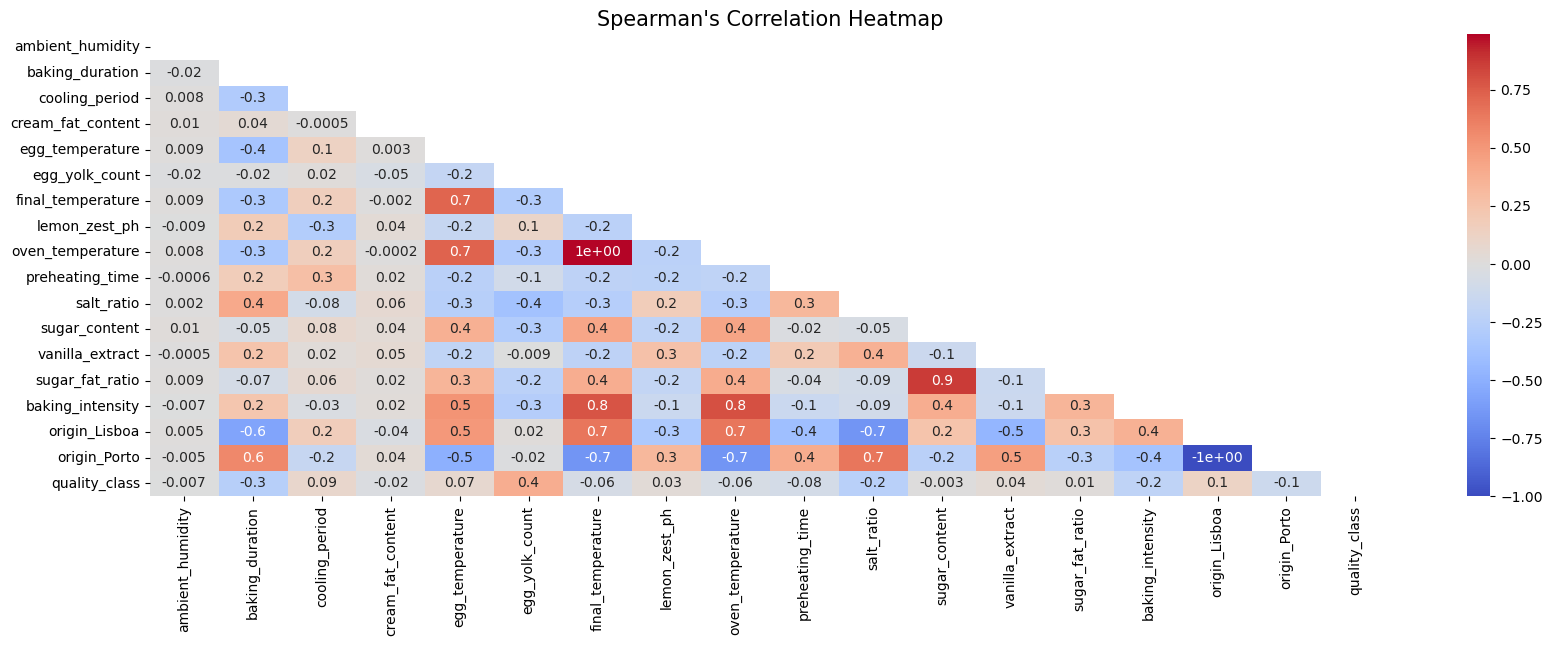

In [ ]:
# Temporarily joining the numeric observations with the target
all_train_numerical = X_train_scaled.join(y_train)

# Computing Spearman's Correlation
correlation = all_train_numerical.corr(method = 'spearman')

# Plotting the lower triangle of the correlation map
def corr_heatmap(correlation):
    plt.figure(figsize=(20, 6))
    ax = sns.heatmap(data = correlation, annot = True, mask = np.triu(np.ones_like(correlation)), cmap = 'coolwarm', fmt = '.1') 
    #the mask= is to show only the lower triangle as the matrix is symmetric and it is easier to read this way
    ax.set_title("Spearman's Correlation Heatmap", fontdict = {'fontsize': 15})
    plt.show()

corr_heatmap(correlation)

**Analysis of Correlation Results:**

The heatmap reveals significant insights into the dataset's structure:

**1. Multicollinearity (Redundant Features):**

We identified several pairs of features with extremely high correlation, indicating they provide duplicate information:

* **`oven_temperature` vs. `final_temperature` (1.0):** These are perfectly correlated. We must **remove one to prevent model instability**.
* **`sugar_fat_ratio` vs. `sugar_content` (0.9):** The engineered feature we created (sugar_fat_ratio) is almost identical to the sugar content itself. Keeping both is redundant.
* **`origin_Lisboa` vs. `origin_Porto` (-0.9):** Strong negative correlation is expected, if a pastél is from Lisbon, it is not from Porto. One should be removed.

**2. Predictive Power (Correlation with Target):**

* **`egg_yolk_count` (0.4):** Positive correlation (More yolks = Better quality?).
* **`baking_duration` (-0.3):** Negative correlation (Longer baking might imply lower quality or burnt tarts).

**Decision:**
To reduce noise and multicollinearity, we will remove `final_temperature` (redundant), `sugar_content` (redundant with ratio), and one of the origin columns.

In [29]:
#we drop immediately because we are SURE these features are not useful
X_train_final = X_train_final.drop(columns=['final_temperature', 'sugar_content', 'origin_Porto'], errors='ignore')
X_val_final   = X_val_final.drop(columns=['final_temperature', 'sugar_content', 'origin_Porto'], errors='ignore')
X_test_final  = X_test_final.drop(columns=['final_temperature', 'sugar_content', 'origin_Porto'], errors='ignore')
X_predict_final = X_predict_final.drop(columns=['final_temperature', 'sugar_content', 'origin_Porto'], errors='ignore')

##### **Chi Squared**

While Spearman's correlation is effective for numerical features, we require a different statistical test to evaluate our categorical predictors, which in this case is only `origin`. So, we wil analyse using the **Chi-Squared.**

We will basically determin if there is a significant relationship between the categorical feature and the target variable (`quality_class`).

In [30]:
def TestIndependence(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result = "{0} is an IMPORTANT predictor".format(var)
    else:
        result = "{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [31]:
for variable in X_train_cat.columns:
    TestIndependence(X_train_cat[variable], y_train, variable)

origin is an IMPORTANT predictor


**Analysis of Chi-Squared Results:**

The test results indicate a strong statistical dependency between **`origin`** and the target variable. The origin of the tart (Lisbon vs. Porto vs. Unknown) is **not random** with respect to quality, which means that knowing the origin significantly helps predict whether a tart will be "OK" or "KO".

**Decision:** We will keep the `origin` feature.

### **3.1.2. Wrapper Methods**

Unlike filter methods, Wrapper Methods evaluate feature importance by actually **training the model** on different subsets. It is essentially a search for the specific combination of variables that have the **highest performance score**. In this case, the only wrapper method we use is **Recursive Feature Elimination (RFE)**.

In [32]:
'''
This is the base estimator for the Recursive Feature Elimination (RFE) process.
We use Logistic Regression as it provides interpretable coefficients, which RFE uses to rank feature importance.
'''
model = LogisticRegression() 

##### **RFE - Recursive Feature Eimination**

 Now, we will use **Recursive Feature Elimination (RFE)** with a Logistic Regression estimator.

To determine the optimal complexity for our model, the RFE process works like in a validation loop. We test subsets, train a new model for each subset size and evaluate its performance on the **Validation Set**.
This approach allows us to identify the exact number of features that maximizes predictive accuracy while minimizing noise, effectively letting the model itself decide which variables are important.

In [ ]:
# Number of features
nof_list = np.arange(1,8)  #perceber pq é 8?
high_score = 0

# Variable to store the optimum features
nof = 0
score_list = []
for n in range(len(nof_list)):
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_final,y_train)
    X_val_rfe = rfe.transform(X_val_final)
    model.fit(X_train_rfe,y_train)

    score = model.score(X_val_rfe,y_val)
    score_list.append(score)

    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.739744


In [34]:
rfe = RFE(estimator = model, n_features_to_select = nof)
rfe_fitted = rfe.fit_transform(X_train_final, y_train)
selected_features = pd.Series(rfe.support_, index = X_train_final.columns)
selected_features

ambient_humidity     False
baking_duration      False
cooling_period       False
cream_fat_content    False
egg_temperature       True
egg_yolk_count        True
lemon_zest_ph        False
oven_temperature      True
preheating_time      False
salt_ratio           False
vanilla_extract      False
sugar_fat_ratio      False
baking_intensity      True
origin_Lisboa        False
dtype: bool

**Analysis of RFE Results:**

The recursive elimination process identified that the model achieves its peak performance on the validation set using a specific subset of features. In this case, its peak was **~0.74%**.

The selected features (listed above) represent the **best** predictors for differentiating between "OK" and "KO" tarts. These features are: `egg_temperature`, `egg_yolk_count`, `oven_temperature` and `baking_intensity`.

### **3.1.3. Embedded Methods**

These methods "embed" the feature selection process directly into the model training phase. Unlike filter methods  or wrapper methods, embedded techniques perform **feature selection and model fitting simultaneously**.

These methods can effectively identify **relevance during the learning process**. We utilized two different approaches within this category:

**Lasso** and a tree-based evaluation **Decision Trees**.

##### **Lasso:**

**Lasso forces the coefficients of less important features to be exactly zero**. Features that do not appear in the bar chart were defined as **irrelevant** by the model, relative to the other features. On the other hand, the **features with the longest bars are considered "more important"**.

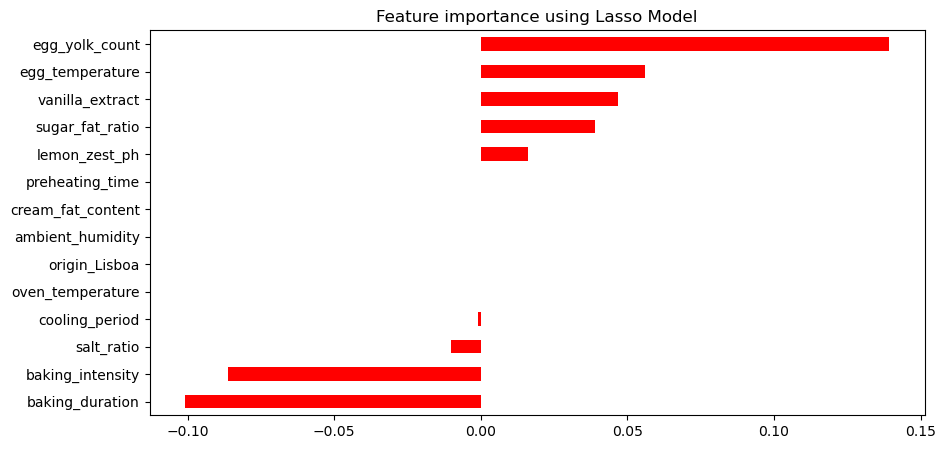

In [35]:
def plot_importance(coef):
    imp_coef = coef.sort_values()
    plt.figure(figsize = (10, 5))
    imp_coef.plot(kind = "barh", color = 'red')
    plt.title("Feature importance using Lasso Model")
    plt.show()

reg = LassoCV()

reg.fit(X_train_final, y_train)

coef = pd.Series(reg.coef_, index = X_train_final.columns)

plot_importance(coef)

**Analysis of Lasso Results:**

The features with coefficient of zero are:
-  `preheating_time` 
-  `cream_fat_content`
-  `ambient_humidity`
-  `origin_Lisboa`
-  `oven_temperature` 

*The `cooling_period` also has an extremely low importance for the predictions. We will keep this in mind and continue with the analysis.*

##### **Tree-Based Feature Importance:**

 We will now utilize **Decision Trees** to evaluate feature importance from a **non-linear perspective**. To ensure robustness, we calculated importance using two different criteria: **Gini Impurity** and **Entropy (Information Gain)**. While Gini measures the probability of misclassification, Entropy measures the reduction in chaos. (explicar melhor a diferença entre gini e entropy (tiago))

 Features appearing at the top of the chart are the most effective at predicting the quality of the pastéis. We expect to see consistency with previous methods.

<Axes: xlabel='Value', ylabel='Features'>

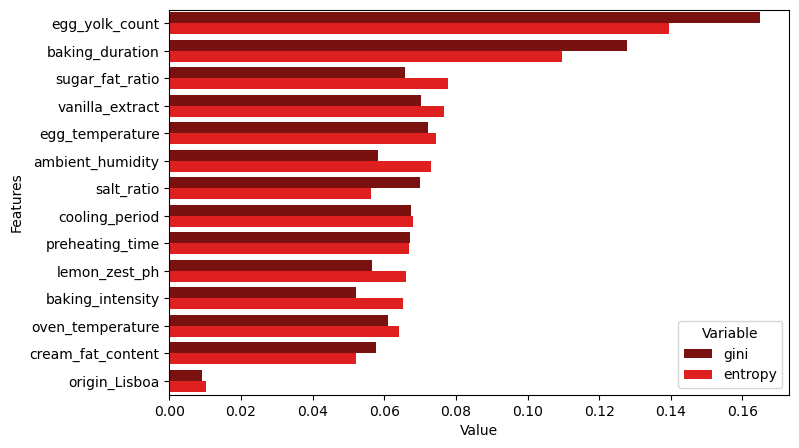

In [36]:
gini_importance = DecisionTreeClassifier(splitter='random', random_state=42).fit(X_train_final, y_train).feature_importances_ # criterion = 'gini' is the default value
entropy_importance = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42).fit(X_train_final, y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns=['gini', 'entropy'])
zippy['Features'] = X_train_final.columns
tidy = zippy.melt(id_vars='Features').rename(columns=str.title)
tidy.sort_values(['Value'], ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(y='Features', x='Value', hue='Variable', data=tidy, palette=['darkred', 'red'])

**Analysis of Tree-Based Results:**

The features that "should be removed" based on this method are: `origin_Lisboa`, `cream_fat_content`, `oven_temperature` and `baking_intensity`.

### **3.2. Voting Strategy**

Since different selection algorithms rely on different properties, they often get conflicting results. To ensure a robust and unbiased selection, we aggregated the results from our three primary predictive methods: **Recursive Feature Elimination (RFE)**, **Lasso Regression**, and **Decision Trees**.


We chose to have a **"Majority Vote" Strategy** to determine the final feature set:
* **Keep:** A feature is retained if it is selected by at least **2 out of the 3** predictive models.
* **Discard:** A feature is removed if it is selected by only 0 or 1 model.
* **Spearman's Check:** Correlation results were used as a secondary validation filter but not as a primary voter (high correlation implies redundancy, low correlation implies independence).


|Feature Data|RFE|Lasso|Decision Tree|Relevance (Decision)|
|---|---|---|---|---|
|Egg Yolk Count|Keep|Keep|Keep|**Keep**|
|Egg Temperature|Keep|Keep|Keep|**Keep**|
|Baking Intensity|Keep|Keep|Discard|**Keep**|
|Baking Duration|Discard|Keep|Keep|**Keep**|
|Sugar Fat Ratio|Discard|Keep|Keep|**Keep**|
|Salt Ratio|Discard|Keep|Keep|**Keep**|
|Vanilla Extract|Discard|Keep|Keep|**Keep**|
|Lemon PH|Discard|Keep|Keep|**Keep**|
|Cooling Period|Discard|Keep|Keep|**Keep**|
|Oven Temperature|Keep|Discard|Discard|**Discard**|
|Preheating Time|Discard|Discard|Keep|**Discard**|
|Ambient Humidity|Discard|Discard|Keep|**Discard**|
|Cream Fat Content|Discard|Discard|Discard|**Discard**|
|Origin (Lisboa)|Discard|Discard|Discard|**Discard**|


The voting process highlighted critical insights that led to the removal of specific features:

1.  **Redundancy of `oven_temperature`:** RFE initially selected `oven_temperature`, both Lasso and Decision Trees discarded it. This is probably because of the presence of `baking_intensity` (which is derived from temperature). The models found that `baking_intensity` have higher importance, making the oven temperature **redundant**.

2.  **Exclusion of `origin`:** The Chi-Squared tests said `origin` was statistically significant, all the other three predictive models (RFE, Lasso, and Trees) did not find it a top predictor. This indicates that the all the other properties are sufficient to predict quality, which means the location label is unnecessary.

**Final Decision:**
Based on this consensus, we proceed to modeling with the following **9 features**:
`['egg_yolk_count', 'egg_temperature', 'baking_intensity', 'baking_duration', 'sugar_fat_ratio', 'salt_ratio', 'vanilla_extract', 'lemon_zest_ph', 'cooling_period']`

In [37]:
features_to_drop = ['ambient_humidity', 'preheating_time', 'oven_temperature', 'cream_fat_content', 'origin_lisboa']
X_train_final = X_train_final.drop(columns=features_to_drop, errors='ignore')
X_val_final   = X_val_final.drop(columns=features_to_drop, errors='ignore')
X_test_final  = X_test_final.drop(columns=features_to_drop, errors='ignore')
X_predict_final = X_predict_final.drop(columns=features_to_drop, errors='ignore')

# **4. Notebook 4: Modelling and Tuning**

## **Introduction**

Following the data preprocessing and the feature selection done above, where we ensure the data was cleaned and ready for the modelling phase and dropped irrelevant and redudant features that didn't add predictive value, this part focuses on the **Modelling and Tuning** phase.

### **Objectives & Our Workflow**

1.  **Establish baseline performance and analysis:**

    1.1. **Establish baseline models:**
    In this first phase we train a diverse portfolio of models using default parameters to establish a baseline performance. The metric used to evaluate this performance will be the accuracy `accuracy_score`.

    1.2. **Baseline Models' analysis and comparison:**
    As previously said, we evaluate the models based on the **accuracy** metric, showing the accuracy of the models in **both training and validation sets**, which allows us not only to observe the models that generalize better in **unseen data**, but also diagnose models that are **overfitting**.

3.  **Selecting the top 4 models to optimize performance**
    After analyzing the models with the default parameters, we select the top 4 most promising models for **optimization.**
    For that we decided to perform Hyperparameter tuning using **GridSearchCV**. We combined this optimization technique with **Stratified K-Fold Cross-Validation** to ensure that our tuning is robust and the selected parameters are the best for predicting **both target classes (OK and KO)**.

2.  **Final model selection**
    After the models' optimization part, we compare the **tuned models** and select the one that has **best score in both train and validation set.**




## **4.1. Establish baseline performance and analysis**

### **4.1.1. Defining baseline models**

Here we **establish the models that are going to be evaluated.** 

In [38]:
"""
We define a dictionary containing all the models we want to use for classification.
This will help us to iterate through them later on for training and evaluation.
"""


models = {
    "Logistic Regression": LogisticRegression(), 
    "Decision Tree":       DecisionTreeClassifier(),
    "Random Forest":       RandomForestClassifier(),
    "LightGBM":            LGBMClassifier(),
    "MLP Classifier":      MLPClassifier(max_iter=1000, early_stopping=True),
    "Gradient Boosting":   GradientBoostingClassifier(),
    "KNClassifier":        KNeighborsClassifier()
}

We selected a diverse set of algorithms ranging from **simple** linear baselines to **complex** methods and neural networks.

* **Logistic Regression:** A linear baseline model that estimates the probability of class membership. It is simpler in terms of complexity and efficiency comparing with more complex algorithms.

It uses a simple mathematical formula to calculate the probability of a tart being "OK" or "KO". It is fast, easy to interpret, and helps us see if a complex model is even necessary.

* **Decision Tree:** A non-linear model that splits data into branches based on feature values. It provides high interpretability but is much likely to overfit if not constrained.

It is very easy to  visualize and interpret but can memorize the training data too easily (overfitting).

* **Random Forest:** A "bagging" ensemble that aggregates predictions from multiple **decision trees**. It reduces variance and improves stability by averaging the errors of individual trees.

An improvement on the single Decision Tree. It builds hundreds of different trees and takes the "majority vote" from all of them. This makes it much more stable and accurate than a single tree.

* **K-Neighbors Classifier (KNN):** An instance-based learner that classifies a data point based on the majority class of its nearest neighbors in the feature space.

A simple algorithm that looks at similar examples. To classify a new tart, it looks at its **nearest "K neighbors"** in the dataset. If the neighbors are mostly "OK", it predicts "OK".

* **Gradient Boosting:** A "boosting" ensemble technique that builds trees sequentially, where each new tree attempts to correct the errors of the previous ones, which gradually reduces the error. It is highly effective for reducing bias.


* **LightGBM:**  An optimized, high-performance implementation of gradient boosting. It uses leaf-wise tree growth and histogram-based algorithms to achieve faster training speeds and higher efficiency on large datasets.


* **MLP Classifier (Multi-Layer Perceptron):** A **feedforward artificial neural network.** It is capable of capturing complex, non-linear relationships through multiple layers of neurons and activation functions.

A computer program inspired by the human brain. It uses layers of mathematical "neurons" to learn complex, hidden patterns in the data that simpler models might miss.

### **4.1.2. Baseline Models' analysis and comparison**

In [39]:
results_list = []

for name, model in models.items():
    # 1. Fit on Train
    model.fit(X_train_final, y_train)
    
    # 2. Predict on Train AND Validation
    train_pred = model.predict(X_train_final)
    val_pred = model.predict(X_val_final)
    
    # 3. Calculate Scores
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    
    
    # Store for later analysis if needed
    results_list.append({
        "Model": name,
        "Train Acc": train_acc,
        "Val Acc": val_acc,
    })

# Optional: View as a sorted DataFrame
print("\n--- Dataframe containing the models sorted by validation accuracy ---")
df_results = pd.DataFrame(results_list).sort_values(by="Val Acc", ascending=False)
display(df_results)

[LightGBM] [Info] Number of positive: 2311, number of negative: 1328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 3639, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635065 -> initscore=0.554006
[LightGBM] [Info] Start training from score 0.554006

--- Dataframe containing the models sorted by validation accuracy ---


,Model,Train Acc,Val Acc
2,Random Forest,1.000000,0.793590
5,Gradient Boosting,0.806540,0.770513
3,LightGBM,0.928552,0.765385
6,KNClassifier,0.818631,0.744872
4,MLP Classifier,0.739214,0.738462
0,Logistic Regression,0.739214,0.725641
1,Decision Tree,1.000000,0.714103


This dataframe created, contains the **accuracy** in training and validation of the baseline models using default parameters.

From this dataframe we can observe that some models perform better than other and some models are overfitting significantly!

**Models overfitting**: 
-  Random Forest
- LightGBM
- Decision Tree Classifier

Note: This overfitting is **expected** for these models when we don't specify parameters to combat the overfitting!

Besides this, we decided to choose these models to optimize their complexity and performance using **GridSearchCV**:
- Gradient Boosting Classifier
- KNeighbors Classifier
- Random Forest Classifier
- LightGBM Classifier

## **4.2. Models' optimization**

**Firstly**, **GridSearchCV** is a technique used to **determine optimal hyperparameters for a given model.**

**"What are hyperparameters?"** Hyperparameters are parameters that are **set before the training phase begins** (unlike model parameters which are learned during training).

GridSearchCV **automates the process of tuning**. It is an exhaustive search method that **evaluates all the combinations of hyperparameters possible within a given hyperparameter set** and **identify which combination returns the best performance.**

How it works:

- **Definition of the parameters grid (set):** We define the hyperparameters and the possible values we want to test for each.
- **Exhaustive Search:** It tries all the combinations possible.
- **Cross-Validation:** For each combination it does a cross validation, getting an **average score**. In our case we use a **Stratified K-Fold Cross-Validation** to ensure the **proportion of "KO" and "OK" classes is the same in every split.**
- **Scoring:** The models are evalauted based on a specific metric. In our case, we use `accuracy_score`.
- **Selection:** Finally, it selects the combination of hyperparameters that produces the highest average score across the validation folds.

**Note:** This validation folds/sets are the folds created by the **Stratified K-Fold Cross-Validation** and not the Validation set created by the **Hold-Out Method** above in the notebook!

In [40]:
"""
This variable "cv_strategy" will be used in GridSearchCV for each baseline model selected.
"""
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### **4.2.1 Optimizing models' performance**

#### **Hyperparameter tuning for Gradient Boosting Classifier.**

In [41]:
"""
Brief explanation of each parameter:
- learning_rate: controls how much contribution each individual tree makes to the final model.
- n_estimators: the total number of trees to build.
- max_depth: the maximum depth of each tree.
- max_leaf_nodes: the maximum number of leaves allowed in a tree.
"""


parameters_Gradient_Boosting_Classifier= {'learning_rate': [0.1, 0.05, 0.01], 
                                          'n_estimators': [100, 150], 
                                          'max_depth': [3, 6, 9], 
                                          'max_leaf_nodes': [3, 6, 9]}


Best_Gradient_Boosting_Classifier = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parameters_Gradient_Boosting_Classifier, cv = cv_strategy, scoring = 'accuracy').fit(X_train_final, y_train)
print(f"Best combination of parameters: {Best_Gradient_Boosting_Classifier.best_params_}")
print(f"Best accuracy score: {Best_Gradient_Boosting_Classifier.best_score_:.3f}")  

Best combination of parameters: {'learning_rate': 0.1, 'max_depth': 6, 'max_leaf_nodes': 9, 'n_estimators': 100}
Best accuracy score: 0.760


**Analyzing the results:**

From the code above, we can observe that the best combination of parameteres is:
- n_estimators = 100
- max_leaf_nodes = 9
- max_depth = 6
- learning_rate = 0.1

**Now we're calculating the validation score (X_val_final):**


In [42]:
Best_Gradient_Boosting_Classifier.score(X_val_final, y_val)

0.7692307692307693

#### **Hyperparameter tuning for Random Forest Classifier.**

In [43]:
"""
Brief explanation of each parameter:
- n_estimators: the number of decision trees in the forest
- max_features: the number of features to consider when looking for the best split.
- max_depth: the maximum depth of each tree.
- max_leaf_nodes: the maximum number of leaves allowed in a tree.
- bootsrap: whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
"""


parameters_Random_Forest_Classifier = {'n_estimators': [50, 100, 150], 
                                       'max_features': ['sqrt', 'log2'], 
                                       'max_depth': [3, 6, 9], 
                                       'max_leaf_nodes': [3, 6, 9],
                                       'bootstrap': [False, True] } 


Best_Random_Forest_Classifier = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters_Random_Forest_Classifier, scoring = 'accuracy', cv = cv_strategy).fit(X_train_final, y_train)
print(f"Best combination of parameters: {Best_Random_Forest_Classifier.best_params_}")
print(f"Best cross-validation score (in train set): {Best_Random_Forest_Classifier.best_score_:.3f}")

Best combination of parameters: {'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150}
Best cross-validation score (in train set): 0.746


**Analyzing the results:**

From the code above, we can observe that the best combination of parameteres is:
- bootsrap = True
- n_estimators = 150
- max_leaf_nodes = 9
- max_features = 'sqrt'
- max_depth = 9

**Now we're calculating the validation score (X_val_final):**


In [44]:
Best_Random_Forest_Classifier.score(X_val_final, y_val)

0.7589743589743589

#### **Hyperparameter tuning for KNClassifier.**

In [61]:
"""
Brief explanation of each parameter:
- n_neighbors: the number of neighbors ($k$) to check around the data point.
- weights: determines how much influence each neighbor has on the vote. 
    'uniform': all neighbors count equally 
    'distance': Closer neighbors have a stronger vote than far ones.
- p: The power parameter for the Minkowski distance metric.
    p=1: 
    p=2: the standard "straight-line" distance.
"""

parameters_KN_Classifier = {'n_neighbors': [25, 45, 65], 
                            'weights': ['uniform'], 
                            'p': [1, 2]}


Best_KNeighbors_Classifier = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters_KN_Classifier, scoring = 'accuracy', cv = cv_strategy).fit(X_train_final, y_train)
print(f"Best combination of parameters: {Best_KNeighbors_Classifier.best_params_}")
print(f"Best accuracy score: {Best_KNeighbors_Classifier.best_score_:.3f}")

Best combination of parameters: {'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}
Best accuracy score: 0.745


**Analyzing the results:**

From the code above, we can observe that the best combination of parameteres is:
- n_neighbors = 11
- p = 1
- weights = distance

**Now we're calculating the validation score (X_val_final):**


In [62]:
Best_KNeighbors_Classifier.score(X_val_final, y_val)

0.7448717948717949

#### **Hyperparameter tuning for LightGBM Classifier.**

In [47]:
"""
Brief explanation of each parameter:
- num_leaves: the maximum number of leaves allowed in a tree.
- max_depth: the maximum depth of each tree.
- learning_rate: controls how much contribution each individual tree makes to the final model.
- n_estimators: the total number of trees to build.
- min_child_samples: The minimum number of data samples required in a leaf node
"""



parameters_LightGBM_Classifier = {
    'num_leaves': [10, 15, 20],
    'max_depth': [5, 10], 
    'learning_rate': [0.1, 0.03, 0.01],
    'n_estimators': [200, 300],
    'min_child_samples': [20, 30, 40],
}

Best_LightGBM_Classifier = GridSearchCV(estimator = LGBMClassifier(), param_grid = parameters_LightGBM_Classifier, scoring = 'accuracy', cv = cv_strategy).fit(X_train_final, y_train)
print(f"Best combination of parameters: {Best_LightGBM_Classifier.best_params_}")
print(f"Best accuracy score: {Best_LightGBM_Classifier.best_score_:.3f}")

[LightGBM] [Info] Number of positive: 1848, number of negative: 1063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 2911, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.634833 -> initscore=0.553009
[LightGBM] [Info] Start training from score 0.553009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

**Analyzing the results:**

From the code above, we can observe that the best combination of parameteres is:
- num_leaves = 20
- n_estimators = 300
- min_child_samples = 40
- max_depth = 5
- learning_rate = 0.03

**Now we're calculating the validation score (X_val_final):**


In [48]:
Best_LightGBM_Classifier.score(X_val_final, y_val)

0.764102564102564

### **4.2.2. Tuned models' analysis and comparison**

Having these scores separated by code is inneficient and provides a **bad visualization** resulting in an **inefficient analysis!**


**In order to facilitate visualization and analysis of the models' scores**, we decided to create two DataFrames, one for training data and the other for validation data.

Also, in order to provide a better comprehension of the models' performance, besides `accuracy_score`, which is our focus, we utilized more classification metrics like `f1_score`, `precision_score` and `recall_score`.

In [63]:
labels = ['Gradient Boosting', 'Random Forest', 'KNeighbors Classifer', 'LightGBM']
# Prediction results on training data
def predict_and_results_train(list_of_models):

    """
    Creating a datframe that will contain the evaluation metrics (F1 Score, Accuracy, Precision, Recall) for each model in the list_of_models for the training data
    """

    f1, accuracy, precision, recall = {}, {}, {}, {}

    for model, label in zip(list_of_models, labels): # Iterate through each model and its corresponding label... zip combines the two lists into pairs
        predictions_train = model.predict(X_train_final)

        """
        This part calculates the evaluation metrics for each model and stores them in each dictionary of the metrics
        """
        f1[label] = f1_score(y_train, predictions_train)
        accuracy[label] = accuracy_score(y_train, predictions_train)
        precision[label] = precision_score(y_train, predictions_train)
        recall[label] = recall_score(y_train, predictions_train)

        results = pd.DataFrame.from_dict({'F1 Score': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    return results # this is a dataframe where the columns are the metrics and the rows are the models' scores for train

# Prediction results on validation data
def predict_and_results_val(list_of_models):

    """
    Creating a datframe that will contain the evaluation metrics (F1 Score, Accuracy, Precision, Recall) for each model in the list_of_models for the validation data
    """

    f1, accuracy, precision, recall = {}, {}, {}, {}

    for model, label in zip(list_of_models, labels):
        predictions_val = model.predict(X_val_final)

        f1[label] = f1_score(y_val, predictions_val)
        accuracy[label] = accuracy_score(y_val, predictions_val)
        precision[label] = precision_score(y_val, predictions_val)
        recall[label] = recall_score(y_val, predictions_val)

        results = pd.DataFrame.from_dict({'F1 Score': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    return results

print('Prediction Results on Training Data')
display(predict_and_results_train([Best_Gradient_Boosting_Classifier, Best_Random_Forest_Classifier, Best_KNeighbors_Classifier, Best_LightGBM_Classifier]))
print('Prediction Results on Validation Data')
display(predict_and_results_val([Best_Gradient_Boosting_Classifier, Best_Random_Forest_Classifier, Best_KNeighbors_Classifier, Best_LightGBM_Classifier]))

Prediction Results on Training Data


,F1 Score,Accuracy,Precision,Recall
Gradient Boosting,0.866653,0.824952,0.839416,0.895716
Random Forest,0.820816,0.758725,0.776748,0.870186
KNeighbors Classifer,0.822640,0.761473,0.779326,0.871051
LightGBM,0.874234,0.836494,0.854545,0.894851


Prediction Results on Validation Data


,F1 Score,Accuracy,Precision,Recall
Gradient Boosting,0.828897,0.769231,0.784173,0.879032
Random Forest,0.822976,0.758974,0.772085,0.881048
KNeighbors Classifer,0.813845,0.744872,0.759162,0.877016
LightGBM,0.822394,0.764103,0.788889,0.858871


## **4.3. Final model selection**

**Considering the results above**, we can conclude that the best model after the optimization phase is the **Gradient Boosting Classifier**.

Now, we will check the `accuracy_score` of the final model in the **test_set** (unseen data) to confirm its performance on unseen data.

(The validation set is unseen data also) **Yes!**

**But the validation set is biased**, because we used it to make decisions. For example, we optimized the models and for some parameters we observed that a value is better than others because the average score was higher on the Validation Set 

In [ ]:
"""
Training the final model with the best combination of parameters
"""

final_model = GradientBoostingClassifier(n_estimators=100, max_leaf_nodes=9, max_depth=6, learning_rate=0.1)
final_model.fit(X_train_final, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,6
,min_impurity_decrease,0.0
,init,None


In [51]:
print("--- FINAL EVALUATION (TEST SET) ---")
test_predictions = final_model.predict(X_test_final)
print(f"Test accuracy: {accuracy_score(y_test, test_predictions)}")

--- FINAL EVALUATION (TEST SET) ---
Test accuracy: 0.7730769230769231


## **5. Conclusion**

This series of notebooks did a job of bringing together the important steps of getting ready for technical work managing features and making predictions. 

It started with a cleanup, where we fixed values that did not make sense and filled in missing data in a smart way so we had a solid base for the algorithms to work with. 

We then worked on making the most of the data by creating our measures that gave us a better understanding of what was happening in production and we made sure all the variables were, in a format that the models could understand by imputing, normalizing and encoding them. 

In model selection part, we analyzed a lot of supervised learning algorithms. **The Gradient Boosting Classifier worked the best before and after optimization.** It was better than the models and other ensemble techniques when comparing the accuracy between the training and validation sets.

The **model's final evaluation on test set**, showed that our model **didn´t memorize data during training**, it **learned the patterns**, **generalizing well on new, unseen data.**

**In summary**, the procedures executed within these notebooks transformed raw, inconsistent data into a refined predictive model, validated and ready to be applied to the final dataset.